In [31]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
import pandas as pd
from sklearn import svm
from matplotlib import pyplot as plt

In [4]:
text=input("Enter Your Search Here: ")
tokenized_text=sent_tokenize(text)
print(tokenized_text)

Enter Your Search Here: Hello, I want to buy a black toyota corolla car
['Hello, I want to buy a black toyota corolla car']


In [5]:
tokenized_text=word_tokenize(text)
print(tokenized_text)

['Hello', ',', 'I', 'want', 'to', 'buy', 'a', 'black', 'toyota', 'corolla', 'car']


In [8]:
s = word_tokenize(text)
print(pos_tag(s))

[('Hello', 'NNP'), (',', ','), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('buy', 'VB'), ('a', 'DT'), ('black', 'JJ'), ('toyota', 'NN'), ('corolla', 'NN'), ('car', 'NN')]


In [60]:
df=pd.read_csv('sem.csv')
df.head()

,No,Sentence,Buy/Sell,Condition,Brand,Model,Type,Color,Year
0,1,I want to buy brandnew toyota corolla black ca...,buy,brandnew,toyota,corolla,car,black,2008
1,2,I want to buy brandnew bmw x1 white suv which ...,buy,brandnew,bmw,x1,suv,white,2007
2,3,I want to buy recondition benz c200 green car ...,buy,recondition,benz,c200,car,green,2017
3,4,I want to buy brandnew audi a1 ash car which m...,buy,brandnew,audi,a1,car,ash,2007
4,5,I want to sell brandnew bmw x3 black suv which...,sell,brandnew,bmw,x3,suv,black,2007


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No         500 non-null    int64 
 1   Sentence   500 non-null    object
 2   Buy/Sell   500 non-null    object
 3   Condition  500 non-null    object
 4   Brand      500 non-null    object
 5   Model      500 non-null    object
 6   Type       500 non-null    object
 7   Color      500 non-null    object
 8   Year       500 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 35.3+ KB


In [63]:
categorical_col = []
for col in df.columns:
    if df[col].dtype == object:
        categorical_col.append(col)
        print(f"{col} => {df[col].unique()}")

Sentence => ['I want to buy brandnew toyota corolla black car which made in 2008'
 'I want to buy brandnew bmw x1 white suv which made in 2007'
 'I want to buy recondition benz c200 green car which made in 2017'
 'I want to buy brandnew audi a1 ash car which made in 2007'
 'I want to sell brandnew bmw x3 black suv which made in 2007'
 'I want to buy recondition bmw x2 red suv which made in 2007'
 'I want to sell recondition toyota allion white car which made in 2007'
 'I want to sell brandnew benz c180 ash car which made in 2014'
 'I want to buy brandnew audi a3 black car which made in 2007'
 'I want to buy brandnew toyota yaris red carb which made in 2018'
 'I want to sell brandnew audi a1 green car which made in 2007'
 'I want to sell recondition benz c180 black car which made in 2012'
 'I want to buy brandnew benz c200 white car which made in 2007'
 'I want to buy recondition audi a3 green car which made in 2008'
 'I want to sell recondition toyota corolla red car which made in 2008

In [64]:
df.isnull().sum()

No           0
Sentence     0
Buy/Sell     0
Condition    0
Brand        0
Model        0
Type         0
Color        0
Year         0
dtype: int64

In [65]:
label_encoder = LabelEncoder()
for col in categorical_col:
    df[col] = label_encoder.fit_transform(df[col])

In [66]:
df.head()

,No,Sentence,Buy/Sell,Condition,Brand,Model,Type,Color,Year
0,1,47,0,0,3,6,0,1,2008
1,2,34,0,0,2,7,1,5,2007
2,3,80,0,1,1,5,0,3,2017
3,4,0,0,0,0,1,0,0,2007
4,5,108,1,0,2,9,1,1,2007


In [130]:
X = df[['Buy/Sell','Condition','Brand','Model','Type','Color','Year']]

In [131]:
Y = df['Sentence']

In [144]:
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20)

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [146]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.457500 (0.058149)
LDA: 0.442500 (0.043373)
KNN: 0.350000 (0.055902)
CART: 0.972500 (0.020767)
NB: 0.377500 (0.063689)
SVM: 0.257500 (0.011456)


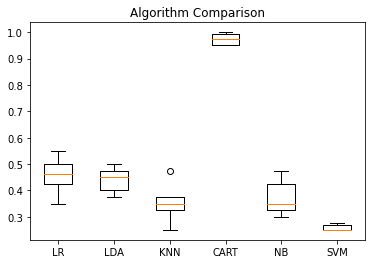

In [147]:
from matplotlib import pyplot
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()